Welcome to Week 2!

We will be focussing in Particle Physics Analysis and detecting matter/antimatter assymetries in the production of certain types of particles. ![LHCb detector](https://www1b.physik.rwth-aachen.de/~schael/LHCb_files/LHCB%20PREVIEW-white-bg.jpg)

The data we are using comes from LHCb - one of the experiments at LHC. It is a highly specialised detector aimed at detecting decays involving the B-quark. Unlike the other major experiments, LHCb detects particles very close to the source and looks almost exclusively in the forward direction - this gives the detector many advantages compared to other experiments at LHC.

In order to get started, we need to access the [ROOT framework](https://root.cern.ch/) and download some datafiles into this machine.
.

In [31]:
#Uncomment when running first time
!wget https://github.com/MohamedElashri/HEP-ML/releases/download/ROOT/ROOT.tar.zip
!unzip /content/ROOT.tar.zip
!tar -xf  ROOT.tar
!apt-get install git dpkg-dev cmake g++ gcc binutils libx11-dev libxpm-dev libxft-dev libxext-dev tar gfortran subversion libpython3.6 
!pip install root_numpy # optional if you want to convert Trees to numpy arrays and other things like that
!pip install uproot awkward lz4 xxhash




In [32]:
import sys
sys.path.append("/content/root_build/")
sys.path.append("/content/root_build/bin/")
sys.path.append("/content/root_build/include/")
sys.path.append("/content/root_build/lib/")



In [33]:
import ctypes
ctypes.cdll.LoadLibrary('/content/root_build/lib/libCore.so')
ctypes.cdll.LoadLibrary('/content/root_build/lib/libThread.so')
ctypes.cdll.LoadLibrary('/content/root_build/lib/libTreePlayer.so')
ctypes.cdll.LoadLibrary('/content/root_build/lib/libImt.so')
ctypes.cdll.LoadLibrary('/content/root_build/lib/libRIO.so')
ctypes.cdll.LoadLibrary('/content/root_build/lib/libNet.so')
ctypes.cdll.LoadLibrary('/content/root_build/lib/libTree.so')
ctypes.cdll.LoadLibrary('/content/root_build/lib/libMathCore.so')
ctypes.cdll.LoadLibrary('/content/root_build/lib/libMatrix.so')
ctypes.cdll.LoadLibrary('/content/root_build/lib/libHist.so')
ctypes.cdll.LoadLibrary('/content/root_build/lib/libGraf.so')
ctypes.cdll.LoadLibrary('/content/root_build/lib/libGpad.so')
ctypes.cdll.LoadLibrary('/content/root_build/lib/libGraf3d.so')
ctypes.cdll.LoadLibrary('/content/root_build/lib/libMultiProc.so')
ctypes.cdll.LoadLibrary('/content/root_build/lib/libMinuit.so')
ctypes.cdll.LoadLibrary('/content/root_build/lib/libFoam.so')
#ctypes.cdll.LoadLibrary('/content/root_build/lib/libPyROOT.so')

<CDLL '/content/root_build/lib/libFoam.so', handle 28a71e0 at 0x7fb2be2094c0>

In [34]:
!which python

/usr/local/bin/python


Warning in <TROOT::Append>: Replacing existing TH1: gauss (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName


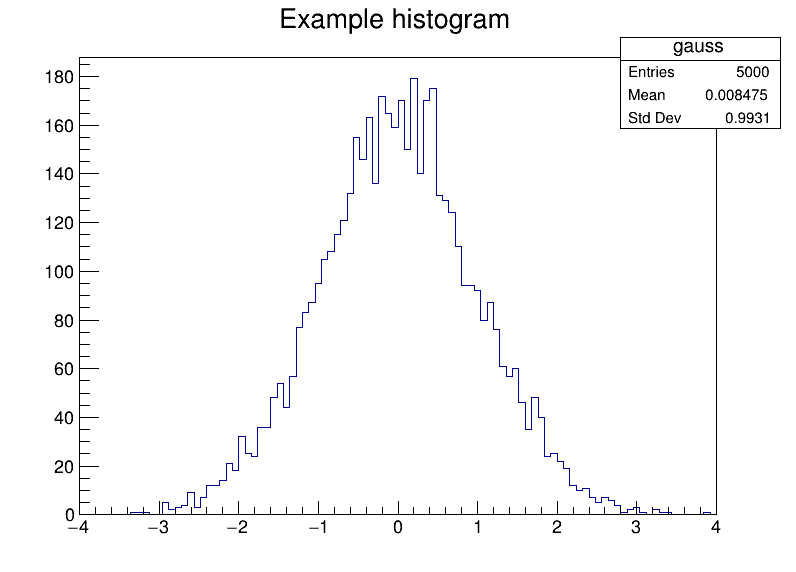

In [35]:
#Now we can check if we have everything working as we expect: 
#Import brings the ROOT framework into our python environment.
import ROOT
#We define a 1 dimensional histogram, with 100 bins which ranges from -4 to +4
h = ROOT.TH1F("gauss","Example histogram",100,-4,4)
#Fill the histogram with gaussian (random) distribution
h.FillRandom("gaus")
#make a Canvas (i.e. a drawing)
c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)
#Draw my histogram
h.Draw()
#Show me the canvas
c.Draw()

In [36]:
#Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:

#Since we need to use ROOT, we must first import this into Python:
import ROOT
#Then we open the ROOT file using the TFile command. - note you need to make this file path correct for your own setup!
f = ROOT.TFile.Open("/content/drive/MyDrive/PRA3024_Big_Data_Analysis/B2HHH_MagnetDown.root", "READONLY")
#From our file, we have to extract the DecayTree 
tree=f.Get("DecayTree")


All being well - this should give no errors and we should have some kind of Gaussian distribution above.

The next step is to get our data file - you can find it on Canvas here: https://canvas.maastrichtuniversity.nl/courses/12320/modules/items/450514

Then upload it either directly or to your Google Drive and then mount this to your Colab environment

In [38]:
#Importing data
import uproot
f=uproot.open("/content/drive/MyDrive/PRA3024_Big_Data_Analysis/B2HHH_MagnetDown.root")
f.keys()

['DecayTree;1']

In [39]:
f["DecayTree"].show()


name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
B_FlightDistance     | double                   | AsDtype('>f8')
B_VertexChi2         | double                   | AsDtype('>f8')
H1_PX                | double                   | AsDtype('>f8')
H1_PY                | double                   | AsDtype('>f8')
H1_PZ                | double                   | AsDtype('>f8')
H1_ProbK             | double                   | AsDtype('>f8')
H1_ProbPi            | double                   | AsDtype('>f8')
H1_Charge            | int32_t                  | AsDtype('>i4')
H1_IPChi2            | double                   | AsDtype('>f8')
H1_isMuon            | int32_t                  | AsDtype('>i4')
H2_PX                | double                   | AsDtype('>f8')
H2_PY                | double                   | AsDtype('>f8')
H2_PZ                | double                   | AsDtype(

#Why are we here?

This week is about finding out something about one of the fundemental questions in physics. Why do we have "stuff".

According to many of our models, and according to many measurements in particle physics, matter and anti-matter appear to be produced in equal quantities.

However, when one looks at the Universe in general, we have more matter than anti-matter left - so there need to be some processes where anti-matter and matter are not produced equally. You can find out more about the Matter/Anti-Matter Asymmetry [here](http://press.web.cern.ch/backgrounders/matterantimatter-asymmetry)

One place we look for this asymetry is in [charge-partity (CP) violation](https://www.symmetrymagazine.org/article/october-2005/explain-it-in-60-seconds) in particle physics processes. This essentially says that the processes that happen in the anti-particle version of a decay do not **exactly** match to the processes that happen in the particle version of the decay.



---



At LHCb, we produce both particle of the  B<sup>+</sup> meson and it's antiparticle the B<sup>-</sup> meson.

We cannot detect these mesons directly. They decay into other things before we have a chance to measure them properly. So we collect data on the decay products, often called daughter particles. There are 524 [documented](http://pdg.lbl.gov/2014/listings/rpp2014-list-B-plus-minus.pdf) ways that the B<sup>+/-</sup> decays into various combinations. In order to simplify the process, we choose decay combinations that are convenient or have particular properties.

In this analysis, we will take the process:-

B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>


To do so, we are given the following data for each event in our system:-

![alt text](https://raw.githubusercontent.com/lhcb/opendata-project/80d64a3796e593fc8f9b257e85f32ae2e54f131f/Images/Variables.png)

Here, H1 is the detected daughter particle (so a Kaon or a Pion), **not** the B-meson - the mother particle. Normally we would have to do some reconstruction from the decay products (the Daughters) to the Mother to be able to make some conclusions.

Let's get started with working with this data:

For our analysis, the momentum of each of the daughter particles is split into the three cartesian components. We have combined these into a variable called H1_Ptot

In [40]:
#Converting data to numpy array
import numpy as np
data = f["DecayTree"].arrays(library="np")
for key in data:
    print(key, data[key])



B_FlightDistance [25.30100385 94.69070022  8.28448951 ...  3.44529043 14.27947859
 11.18207081]
B_VertexChi2 [1.49728005 1.38333774 5.1871014  ... 1.63298657 2.23107336 2.11662914]
H1_PX [  375.2842054  -4985.13078543 -1265.45654435 ...  2606.91083928
  -294.71098895   499.04234923]
H1_PY [ 831.30848054 5853.75005722 2330.05078835 ... -945.53433931  975.48946389
 -213.18353447]
H1_PZ [ 51820.23371814 326157.45470561  90762.65803161 ...  37152.29054175
  35900.13009178   5182.7065705 ]
H1_ProbK [0.03861552 0.07355624 0.03009453 ... 0.00443438 0.02086601 0.02278718]
H1_ProbPi [0.88875508 0.03906399 0.63669282 ... 0.91009867 0.66330224 0.78597152]
H1_Charge [-1 -1  1 ...  1  1 -1]
H1_IPChi2 [ 212.77677609  373.81588464   53.18785459 ...  144.8740285   131.85476428
 1601.81902171]
H1_isMuon [0 1 0 ... 0 1 1]
H2_PX [ 708.07313337  144.30088637 -739.50632395 ...   72.09402074 -610.63205694
  -87.84610063]
H2_PY [-1098.15647587    85.20530011 -1036.73679198 ...  -197.6953736
   456.39646549 -

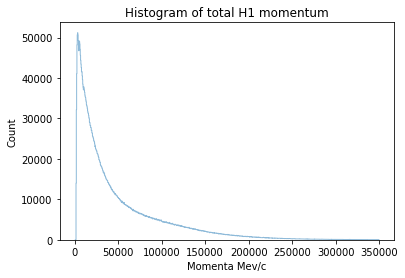

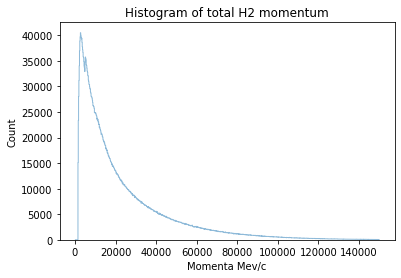

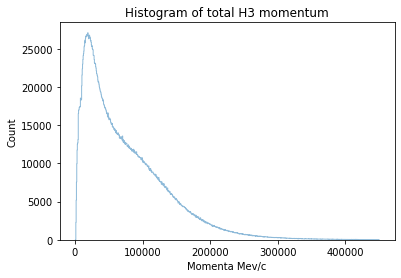

In [41]:
#Here make a plot of the Total momentum of each of the three daughters
from math import *
import matplotlib.pyplot as plt

H1_Ptot = np.sqrt(data["H1_PX"]**2 + data["H1_PY"]**2 + data["H1_PZ"]**2)
H2_Ptot = np.sqrt(data["H2_PX"]**2 + data["H2_PY"]**2 + data["H2_PZ"]**2)
H3_Ptot = np.sqrt(data["H3_PX"]**2 + data["H3_PY"]**2 + data["H3_PZ"]**2)

# Total momentum H1
plt.hist(H1_Ptot, bins=1000, range=(0, 350000), histtype='step', alpha=0.5)
plt.xlabel("Momenta Mev/c")
plt.ylabel("Count")
plt.title("Histogram of total H1 momentum")
plt.show()

# Total momentum H2
plt.hist(H2_Ptot, bins=1000, range=(0, 150000), histtype='step', alpha=0.5)
plt.xlabel("Momenta Mev/c")
plt.ylabel("Count")
plt.title("Histogram of total H2 momentum")
plt.show()

# Total momentum H3
plt.hist(H3_Ptot, bins=1000, range=(0, 450000), histtype='step', alpha=0.5)
plt.xlabel("Momenta Mev/c")
plt.ylabel("Count")
plt.title("Histogram of total H3 momentum")
plt.show()




Now plot the total momentum for the mother (M_Ptot)

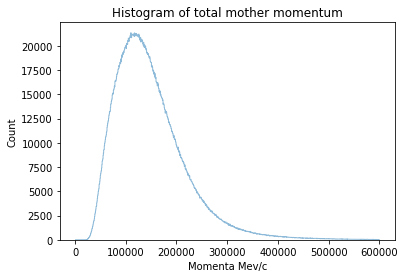

In [42]:
#use the histogram plotting tools, plot the momentum of the mother
M_Ptot = np.sqrt((data["H1_PX"] + data["H2_PX"] + data["H3_PX"])**2 + (data["H1_PY"] + data["H2_PY"] + data["H3_PY"])**2 + (data["H1_PZ"] + data["H2_PZ"] + data["H3_PZ"])**2)
plt.hist(M_Ptot, bins=1000, range=(0, 600000), histtype='step', alpha=0.5)
plt.xlabel("Momenta Mev/c")
plt.ylabel("Count")
plt.title("Histogram of total mother momentum")
plt.show()

Let's take a look at the whole data file that is available to us by looking at one specific entry - number 45

In [43]:
#I don't know how to reproduce this without ROOT, and it tends to crash if I run tree.show(45)

We have now completed the initial steps and begun to work through what we need to with the data. This is a perfect moment to take a coffee!

Having discovered all of the relevant information about our daughter particles, we need to combine the measurements about them into a single mother - which will be our B<sup>+</sup> or our B<sup>-</sup>

Having found our momentum and energy, we can use these quantities to find our experimental mass (not the theoretical mass as we have used for the reconstruction).

When we calculate this, we will get a distribution of masses. This is due to errors in the measurements made either by the detector, or in the experiment itself. We hope to have a reasonably narrow peak to work with, but, sometimes this is not possible.

Additionally there will be other particles in the detector - which means our daughters might have come from two or even three different processes. Events which don't come from the same process will give a higher or lower mass than we are looking for. This is typically called the *background* while events which come from our event of interest are called the *signal*

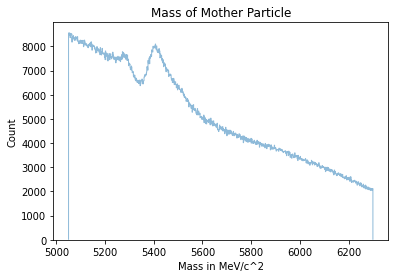

In [44]:
#Now plot a histogram of the range of masses of the B meson.
#Does this match what we would expect from theory?


#Assuming all daughter particles are Kaons. 

#Creating some more easily named arrays
H1_ProbK = data["H1_ProbK"]
H2_ProbK = data["H2_ProbK"]
H3_ProbK = data["H3_ProbK"]
H1_ismuon = data["H1_isMuon"]
H2_ismuon = data["H2_isMuon"]
H3_ismuon = data["H3_isMuon"]
H1_PX = data["H1_PX"]
H1_PY = data["H1_PY"]
H1_PZ = data["H1_PZ"]
H2_PX = data["H2_PX"]
H2_PY = data["H2_PY"]
H2_PZ = data["H2_PZ"]
H3_PX = data["H3_PX"]
H3_PY = data["H3_PY"]
H3_PZ = data["H3_PZ"]
H1_IPChi2 = data["H1_IPChi2"]
H2_IPChi2 = data["H2_IPChi2"]
H3_IPChi2 = data["H3_IPChi2"]
B_VertexChi2 = data["B_VertexChi2"]
K_mass = 493.677 #Mass of K+ & K- in MeV/c^2, from https://en.wikipedia.org/wiki/Kaon

#Computing energy using energy-momentum relation and plotting
E_H1 = np.sqrt(H1_Ptot**2 + K_mass**2)
E_H2 = np.sqrt(H2_Ptot**2 + K_mass**2)
E_H3 = np.sqrt(H3_Ptot**2 + K_mass**2)
Mother_Mass = np.sqrt((E_H1 + E_H2 + E_H3)**2 - ((H1_PX + H2_PX + H3_PX)**2 + (H1_PY + H2_PY + H3_PY)**2 + (H1_PZ + H2_PZ + H3_PZ)**2))
plt.hist(Mother_Mass, bins=1000, histtype='step', alpha=0.5, label = "Mass")
plt.xlabel("Mass in MeV/c^2")
plt.ylabel("Count")
plt.title("Mass of Mother Particle")
plt.show()








We know that some of our particles are the B+ and some are the B- particle. There will also be some particles in our system that are not coming from a genuine B+/- or are a B+/- but are not constructed from Kaons.

We have some tools available to help:-

  *  During detection, software attributes the probability of a particle being a Kaon or a Pion (in the H1_ProbK or H1_ProbPi variable)
  * The detector also knows if the particle was a Muon - since it has detectors specifically for these. So it can attribute a 0 or a 1 to this probability
  * The reconstructed vertex has a some kind of quality associated with it (we call this the Vertex χ2 (this is the variable B_VertexChi2). This is the statistical measure that determines how well we found a single point to be the source of all three particles.



In order to get a better result, we should select our data to have the properties we desire and make some rules (often called a selection) to cut away data we don't want to include for various reasons. e.g. we know we don't have any muons in our decay - so any time H1/H2/H3 are a muon they should be excluded. The other variables are not so clear - so we can plot them to make a decision.

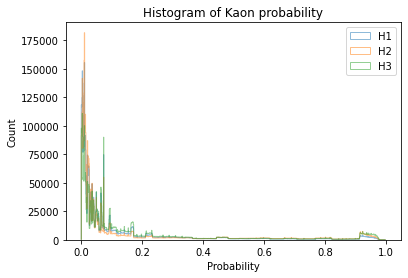

In [45]:
#Make plots of H1/H2/H3 _ProbK on one plot
#Make plots of H1/H2/H3 _ProbPi on one plot
#For all our particles, make a plot of the B_VertexChi2
plt.hist(data["H1_ProbK"], bins=1000, range = (0, 1), histtype='step', alpha=0.5, label = "H1")
plt.hist(data["H2_ProbK"], bins=1000, range = (0, 1), histtype='step', alpha=0.5, label = "H2")
plt.hist(data["H3_ProbK"], bins=1000, range = (0, 1), histtype='step', alpha=0.5, label = "H3")
plt.xlabel("Probability")
plt.ylabel("Count")
plt.title("Histogram of Kaon probability")
plt.legend()
plt.show()


Using these plots, we can now make a preselection string. This is a text string that looks like 

In [46]:
#This example is for each daughter particle to have a Probability of being a Pion being more than 90% and H1 to not be a muon
#This is not a good choice of selection - you should make your own :)
selection=("H1_ProbPi>0.9&H2_ProbPi>0.9&H3_ProbPi>0.9&!H1_isMuon&H2_isElectron&H3_isElephant")

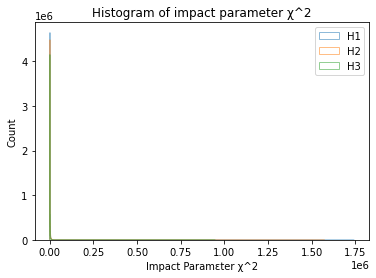

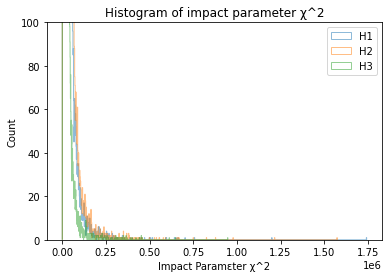

In [47]:


#According  Tsopelas, P.C.. / A silicon pixel detector for LhCb. 2016. 162 p. 
# https://research.vu.nl/en/publications/a-silicon-pixel-detector-for-lhcb 
# We need to filter for a large impact parameter, as this is "typical" for a b-meson decay

plt.hist(H1_IPChi2, bins=1000, histtype='step', alpha=0.5, label = "H1")
plt.hist(H2_IPChi2, bins=1000, histtype='step', alpha=0.5, label = "H2")
plt.hist(H3_IPChi2, bins=1000, histtype='step', alpha=0.5, label = "H3")
plt.xlabel("Impact Paramεter χ^2")
plt.ylabel("Count")
plt.title("Histogram of impact parameter χ^2")
plt.legend()
plt.show()

plt.hist(data["H1_IPChi2"], bins=1000, histtype='step', alpha=0.5, label = "H1")
plt.hist(data["H2_IPChi2"], bins=1000, histtype='step', alpha=0.5, label = "H2")
plt.hist(data["H3_IPChi2"], bins=1000, histtype='step', alpha=0.5, label = "H3")
plt.xlabel("Impact Paramεter χ^2")
plt.ylabel("Count")
plt.title("Histogram of impact parameter χ^2")
plt.legend()
plt.ylim(0, 100)
plt.show()

#As can be seen, the majority of impact paramaters are low. I could for example filter for χ^2 > 0.25^6


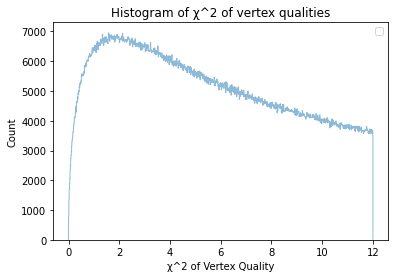

In [48]:
#We want the quality of the vertex to be high, so that we know the 3 daughter particles originated from the same mother

plt.hist(B_VertexChi2, bins=1000, histtype='step', alpha=0.5)
plt.xlabel("χ^2 of Vertex Quality")
plt.ylabel("Count")
plt.title("Histogram of χ^2 of vertex qualities")
plt.legend()
plt.show()

#I don't see any clear way of selecting part of this data, so I will leave the vertex quality as is and don't do any extra filtering


In [49]:
#Combining all our requirements and finding the indices where one of the qualities I don't want is true
indices_filter_H1 = np.where((H1_ProbK <= 0.9) | (H1_ismuon == 1) | (H1_IPChi2 <= 0.25**6))[0]
indices_filter_H2 = np.where((H2_ProbK <= 0.9) | (H2_ismuon == 1) | (H2_IPChi2 <= 0.25**6))[0]
indices_filter_H3 = np.where((H3_ProbK <= 0.9) | (H3_ismuon == 1) | (H3_IPChi2 <= 0.25**6))[0]


#Combining all found indices
allindices = np.concatenate((indices_filter_H1, indices_filter_H2, indices_filter_H3))
#Removing duplicates & sorting indices in order
allindices = np.unique(allindices)
allindices = np.sort(allindices)

#Deleting all these indices that I don't want
H1_PX_f = np.delete(H1_PX, allindices)
H1_PY_f = np.delete(H1_PY, allindices)
H1_PZ_f = np.delete(H1_PZ, allindices)
H2_PX_f = np.delete(H2_PX, allindices)
H2_PY_f = np.delete(H2_PY, allindices)
H2_PZ_f = np.delete(H2_PZ, allindices)
H3_PX_f = np.delete(H3_PX, allindices)
H3_PY_f = np.delete(H3_PY, allindices)
H3_PZ_f = np.delete(H3_PZ, allindices)



5313.811459625264
5537.359822021801
190.11164646048613
337.63032914941647


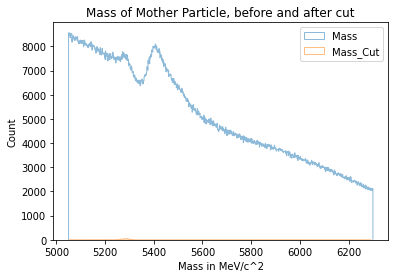

In [50]:
#Now as a good check, we should see the effect of applying our cuts.
#On one histogram, plot the B meson mass, from both the tree (pre-cuts) and the CutTree (post-cuts)
#What do you notice about your histogram now?


#Recomputing the M_Ptot_squared
M_Ptot_cut_squared = (H1_PX_f + H2_PX_f + H3_PX_f)**2 + (H1_PY_f + H2_PY_f + H3_PY_f)**2 + (H1_PZ_f + H2_PZ_f + H3_PZ_f)**2
H1_Ptot_cut = np.sqrt(H1_PX_f**2 + H1_PY_f**2 + H1_PZ_f**2)
H2_Ptot_cut = np.sqrt(H2_PX_f**2 + H2_PY_f**2 + H2_PZ_f**2)
H3_Ptot_cut = np.sqrt(H3_PX_f**2 + H3_PY_f**2 + H3_PZ_f**2)

E_H1_cut = np.sqrt(H1_Ptot_cut**2 + K_mass**2)
E_H2_cut = np.sqrt(H2_Ptot_cut**2 + K_mass**2)
E_H3_cut = np.sqrt(H3_Ptot_cut**2 + K_mass**2)
Mother_Mass_cut = np.sqrt((E_H1_cut + E_H2_cut + E_H3_cut)**2 - (M_Ptot_cut_squared))

plt.hist(Mother_Mass, bins=1000, histtype='step', alpha=0.5, label = "Mass")
plt.hist(Mother_Mass_cut, bins=1000, histtype='step', alpha=0.5, label = "Mass_Cut")
plt.legend()
plt.xlabel("Mass in MeV/c^2")
plt.ylabel("Count")
plt.title("Mass of Mother Particle, before and after cut")
plt.show

print(np.mean(Mother_Mass_cut))
print(np.mean(Mother_Mass))
print(np.std(Mother_Mass_cut))
print(np.std(Mother_Mass))
#It seems like a very large amount of the data has been cut out, and our new mean lies a bit closer to the value 
#that can be found online and the standard deviation is also smaller
#One more thing that could be tried is putting some limit on the vertex quality, see next code cell

5347.948441140928
5537.359822021801
238.66368154408838
337.63032914941647


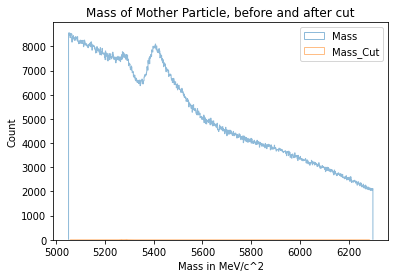

In [51]:
#Putting a limit halfway, leaving only the χ^2 values larger than 6
indices_filter_H1 = np.where((H1_ProbK <= 0.9) | (H1_ismuon == 1) | (H1_IPChi2 <= 0.25**6) | (B_VertexChi2 <= 6))[0]
indices_filter_H2 = np.where((H2_ProbK <= 0.9) | (H2_ismuon == 1) | (H2_IPChi2 <= 0.25**6) | (B_VertexChi2 <= 6))[0]
indices_filter_H3 = np.where((H3_ProbK <= 0.9) | (H3_ismuon == 1) | (H3_IPChi2 <= 0.25**6) | (B_VertexChi2 <= 6))[0]


#Combining all indices
allindices = np.concatenate((indices_filter_H1, indices_filter_H2, indices_filter_H3))
#Removing duplicates & sorting indices in order
allindices = np.unique(allindices)
allindices = np.sort(allindices)

#Deleting the indices again
H1_PX_f = np.delete(H1_PX, allindices)
H1_PY_f = np.delete(H1_PY, allindices)
H1_PZ_f = np.delete(H1_PZ, allindices)
H2_PX_f = np.delete(H2_PX, allindices)
H2_PY_f = np.delete(H2_PY, allindices)
H2_PZ_f = np.delete(H2_PZ, allindices)
H3_PX_f = np.delete(H3_PX, allindices)
H3_PY_f = np.delete(H3_PY, allindices)
H3_PZ_f = np.delete(H3_PZ, allindices)

M_Ptot_cut_squared = (H1_PX_f + H2_PX_f + H3_PX_f)**2 + (H1_PY_f + H2_PY_f + H3_PY_f)**2 + (H1_PZ_f + H2_PZ_f + H3_PZ_f)**2
H1_Ptot_cut = np.sqrt(H1_PX_f**2 + H1_PY_f**2 + H1_PZ_f**2)
H2_Ptot_cut = np.sqrt(H2_PX_f**2 + H2_PY_f**2 + H2_PZ_f**2)
H3_Ptot_cut = np.sqrt(H3_PX_f**2 + H3_PY_f**2 + H3_PZ_f**2)

E_H1_cut = np.sqrt(H1_Ptot_cut**2 + K_mass**2)
E_H2_cut = np.sqrt(H2_Ptot_cut**2 + K_mass**2)
E_H3_cut = np.sqrt(H3_Ptot_cut**2 + K_mass**2)
Mother_Mass_cut = np.sqrt((E_H1_cut + E_H2_cut + E_H3_cut)**2 - (M_Ptot_cut_squared))

plt.hist(Mother_Mass, bins=1000, histtype='step', alpha=0.5, label = "Mass")
plt.hist(Mother_Mass_cut, bins=1000, histtype='step', alpha=0.5, label = "Mass_Cut")
plt.legend()
plt.xlabel("Mass in MeV/c^2")
plt.ylabel("Count")
plt.title("Mass of Mother Particle, before and after cut")
plt.show

print(np.mean(Mother_Mass_cut))
print(np.mean(Mother_Mass))
print(np.std(Mother_Mass_cut))
print(np.std(Mother_Mass))
# This arbitrary limit has brought the mean a bit up again, so not that fruitful

Text(0.5, 1.0, 'Mass of Mother Particle, before and after cut, zoomed in')

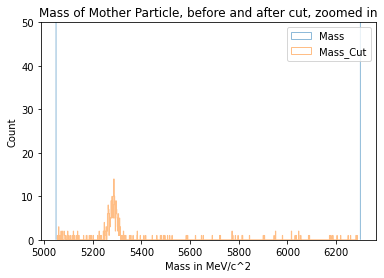

In [52]:
#Zoomed in plot
plt.hist(Mother_Mass, bins=1000, histtype='step', alpha=0.5, label = "Mass")
plt.hist(Mother_Mass_cut, bins=1000, histtype='step', alpha=0.5, label = "Mass_Cut")
plt.ylim(0, 50)
plt.legend()
plt.xlabel("Mass in MeV/c^2")
plt.ylabel("Count")
plt.title("Mass of Mother Particle, before and after cut, zoomed in")

#How do we count the number of events?

We now have a histogram of events that we have reconstructed as a B meson. But some of these events are caused by a co-incidence of events which would still occur if there were no B mesons actually produced. We call this the background. Background and signal are indistinguishable now as the detector cannot tell the difference and our cuts were unable to remove the events for physics reasons. We can do some statistical analysis, if we know the approximate shapes of our signal and our background. Just like a least-squares fitting we can run a fit routine to minimise the error between the fitted curve and our data. As an example, if we know our data has an exponential background and a gaussian signal:

![Gaussian+Exp Background](https://twiki.cern.ch/twiki/pub/RooStats/RooStatsTutorialsJune2013/GausExpModelFit.png)

Here the red line represents our signal, the blue dotted line is our background and the solid blue line is our combined curve. The graph also shows the number of signal events and the number of background events. The signal now is a tiny fraction of the total data shown in the plot.

In order to do this, we need to build a fit model, around which the software can try to fit our data.

We use RooFit for this, which includes:
* Gaussian
* Exponential
* Chebychev
* Crystal Ball
* Breit-Wigner

As well as several other choices.

Typically exponential and Chebychev functions are used for background and Gaussian, Crystal Ball and Breit-Wigner are used for signal. We can also combine them (e.g. 1 crystal ball, 1 gaussian, 1 exponential) in various ways.

In [53]:
#Uncomment when running first time
# from scipy.stats import norm, expon
# # !pip install iminuit
# from iminuit import Minuit
!pip install uproot4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [54]:
import uproot4
f=uproot4.open("/content/drive/MyDrive/PRA3024_Big_Data_Analysis/B2HHH_MagnetDown.root")
tree = f["DecayTree"]
arrays = tree.arrays()

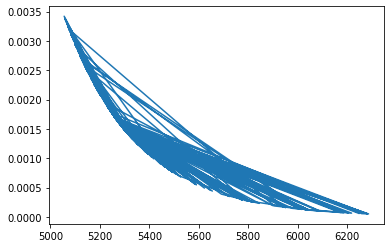

In [74]:
from scipy.stats import norm, expon
import scipy.stats as stats
M_m0 = Mother_Mass_cut

gaussMean = np.mean(M_m0)
gaussWidth = np.std(M_m0)

#Creating the Gaussian
Gauss = norm(loc = gaussMean, scale = gaussWidth)

#Creating the exponential
fitting_parameters = stats.expon.fit(M_m0)
loc = fitting_parameters[0]
scale = fitting_parameters[1]
Exponential = expon.pdf(scale = scale, loc = loc, x = M_m0)

y = expon.pdf(x = M_m0, loc=loc, scale=scale)

plt.plot(M_m0, y)
plt.show()

# Looks a bit strange, but all of this is new to me and I don't know how to go about combining the PDF's without using ROOT
# I will leave it like this, and write the rest of my code assuming ROOT is working and not crashing

In [57]:
#define physical measurment that we want to fit using RooRealVar
# var = ROOT.RooRealVar =("Variable from Python", "Nickname",Min, Max, Units)
mass = ROOT.RooRealVar("M_m0","Mass",4700,5900,"MeV/C^{2}")

#passing the rest of the variables into the model
#For the RooRealVar the last three parameters are given, "starting value" and min/max values
gaussMean = ROOT.RooRealVar("Mean","Mean",4800,4900,5900)
gaussWidth = ROOT.RooRealVar("Width","Width",40,0,7000)

#Now we have enough to make our Model for the signal:

Gauss=ROOT.RooGaussian("Gaussian Signal","Gauss",mass,gaussMean,gaussWidth)
Gauss_Norm= ROOT.RooRealVar("Gauss_Norm","Signal Yield", tree.GetEntries()/30, 0, tree.GetEntries() * 3)
#We also need a background, so let's use a (simple) exponential:

exponent=ROOT.RooRealVar("exponent", "C", -0.02, -2, +2)
exp_Norm= ROOT.RooRealVar("exp_Norm","Background Yield", tree.GetEntries()/30, 0, tree.GetEntries() * 2)

#Define the  model for the background:

Bkgnd=ROOT.RooExponential("Exponential Background","Bkgnd",mass,exponent)

#Now we need to combine these two functions into a single PDF (probability density function)
#and we need to add the normalisation factors at the end as scaling factors

model=ROOT.RooAddPdf("Full Model","model",ROOT.RooArgList(Gauss,Bkgnd),ROOT.RooArgList(Gauss_Norm, exp_Norm) )

# Nieuwe sectie

In [75]:
#Put our data set into a RooDataSet structure

data_to_fit=ROOT.RooDataSet("Data Set","data_to_fit", CutTree, ROOT.RooArgSet(mass))

#Then we can do the fitting:

model.fitTo(data_to_fit)

#if everything went well, you will see the outputs of RooFit below
# Unfortunately, the model fitting crashes whenever I try to run it, so for the rest of the code I will just try coding what I would
# Theoretically do

NameError: ignored

In [76]:
#Now to plot it all
c1=ROOT.TCanvas("c1","c1")
frame=mass.frame()
data_to_fit.plotOn(frame)
model.plotOn(frame, ROOT.RooFit.Components("Gauss"),ROOT.RooFit.LineColor(8),ROOT.RooFit.LineStyle(2))
model.plotOn(frame, ROOT.RooFit.Components("Bkgnd"),ROOT.RooFit.LineColor(46),ROOT.RooFit.LineStyle(2))
model.plotOn(frame)
frame.Draw()
c1.Update()


NameError: ignored

In [ ]:
#Crystal ball function
# X0, the location parameter for the gaussian component, is set as the mean of the calculated mother mass
# sigmaLR, the standard deviation of the gaussian component, is set as the standard deviation of the calculated mother mass
#RooCrystalBall takes: name, nickname, x = variable, x0 = location of gaussian component (mean), sigmaLR = width of gaussian component (standard dev)
# From:https://root.cern.ch/doc/master/classRooCrystalBall.html#a8b556d28a3315044d6033002c81bf1c4
Crystal = ROOT.RooCrystalBall("Crystalball signal", "Crystal", x = mass, gaussMean, sigmaLR = gaussWidth) 

#Crystalball + exponential
# I'm not sure what I would put as scaling factor for the crystal ball, could do the same as for Gaussian
Crystal_Norm= ROOT.RooRealVar("Crystal_Norm","Signal Yield", tree.GetEntries()/30, 0, tree.GetEntries() * 3)
model=ROOT.RooAddPdf("Full Model","model",ROOT.RooArgList(Crystal,Bkgnd), ROOT.RooArgList(Crystal_Norm, exp_Norm))

#Chebychev function
# Polynomial order between 1 and 10, starting at 5
Polynomial_order = ROOT.RooRealVar("Order", "Order", 5, 1, 10)
#Inputs: Name, nickname, variable (mass), order of the polynomial
Chebychev = ROOT.RooChebychev("Chebychev signal", "Chebychev", mass, Polynomial_order)

#Gauss + Chebychev
#Using the same normalization as for exponential for the chebychev
Chebychev_Norm = ROOT.RooRealVar("exp_Norm","Background Yield", tree.GetEntries()/30, 0, tree.GetEntries() * 2)
model=ROOT.RooAddPdf("Full Model","model",ROOT.RooArgList(Gauss, Chebychev), ROOT.RooArgList(Gauss_Norm, Chebychev_Norm))


Using this structure, you can in theory build whatever models you like!

Some recommendations (but not necessary to do all):-



*   Gauss+Exponential (as above)
*   Crystal Ball + Exponential
*   Gauss+Crystal Ball+Exponential (now you need to weigh the two signal peaks and then the total signal against total background)
*   Gauss+Chebychev
*   Two Crystal Balls + Exponential

So how good was the fit, and how many events do you have?

We can use the .getValV() function on our signal and background *normalisation* components, e.g. Gauss_Norm=Gauss.getValV()

To find the error (on this number) we can use .getError()

Neither of these measures would tell us if this was a good fit or not. Normally we use a χ2 test to do so - this is built into the image we made (so we can do frame.chiSquare() to get this data)

For each model you made, print the signal and background yields (with errors) and report the χ2

#Counting

So we have now loaded our data; we have reconstructed information about the mother B meson and we have cut away any data which looks like it might not be what we are looking for. We have then plotted histograms of the mass of the B meson and used this to fit a model, a function to describe the events there. We now have to identify which of our events belong to the B<sup>+</sup> and how many of them belong to B<sup>-</sup>.

To do this, should split out data into two groups (and throw away data which doesn't comply with either decay)

We will be looking for the events which are


B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>

We can look for the number of positive and negative charges in H1, H2 and H3 (using the variable ```H1_Charge``` etc.). If we have 0 or 3 positive charges, we should throw the event away and if we have 1 it should be assigned be a B<sup>-</sup>, with 2 it should be a B<sup>+</sup>

Once we have defined if it's a B<sup>+</sup> or a B <sup>-</sup>, we should go ahead and ensure the pre-selection is applied and then plot our B mass, and fit the model to find the yield.

We can then calculate the assymetry from this equation:

$A=\frac{(N^{B-}-N^{B+})}{(N^{B-}+N^{B+})}$

Where N<sup>B+/- </sup> is the number of events found from the fitted yield of the signal from each data set.

The uncertainty on this result is given by:

$\sigma_A=\sqrt\frac{1-A^2}{N^{B-}+N^{B+}}$

Calculate these two values for your data and print them below:

In [65]:
#Here do your calculation of the final result
H1_Charge = data["H1_Charge"]
H2_Charge = data["H2_Charge"]
H3_Charge = data["H3_Charge"]

#Pre filtering to get the relevant indices
H1_Charge_f = np.delete(H1_Charge, allindices)
H2_Charge_f = np.delete(H2_Charge, allindices)
H3_Charge_f = np.delete(H3_Charge, allindices)

#Filters for B+ or B-
positive_filter = np.where(H1_Charge_f + H2_Charge_f + H3_Charge_f == 1)
negative_filter = np.where(H1_Charge_f + H2_Charge_f + H3_Charge_f == -1)

#Modifying data for B+
H1_PX_plus = H1_PX_f[positive_filter]
H1_PY_plus = H1_PY_f[positive_filter]
H1_PZ_plus = H1_PZ_f[positive_filter]

H2_PX_plus = H2_PX_f[positive_filter]
H2_PY_plus = H2_PY_f[positive_filter]
H2_PZ_plus = H2_PZ_f[positive_filter]

H3_PX_plus = H3_PX_f[positive_filter]
H3_PY_plus = H3_PY_f[positive_filter]
H3_PZ_plus = H3_PZ_f[positive_filter]

#Modifying data for B-
H1_PX_minus = H1_PX_f[negative_filter]
H1_PY_minus = H1_PY_f[negative_filter]
H1_PZ_minus = H1_PZ_f[negative_filter]

H2_PX_minus = H2_PX_f[negative_filter]
H2_PY_minus = H2_PY_f[negative_filter]
H2_PZ_minus = H2_PZ_f[negative_filter]

H3_PX_minus = H3_PX_f[negative_filter]
H3_PY_minus = H3_PY_f[negative_filter]
H3_PZ_minus = H3_PZ_f[negative_filter]


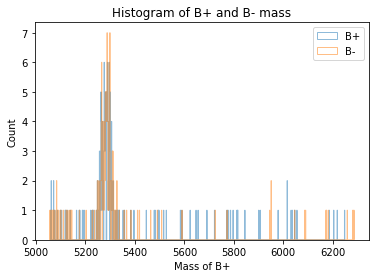

5364.534065355519
240.27271311258636
5330.417522281982
235.68562365789074


In [70]:
#Plotting the mass histograms for B+ and for B-
#B+
M_Ptot_cut_squared_plus = (H1_PX_plus + H2_PX_plus + H3_PX_plus)**2 + (H1_PY_plus + H2_PY_plus + H3_PY_plus)**2 + (H1_PZ_plus + H2_PZ_plus + H3_PZ_plus)**2
H1_Ptot_cut_plus = np.sqrt(H1_PX_plus**2 + H1_PY_plus**2 + H1_PZ_plus**2)
H2_Ptot_cut_plus = np.sqrt(H2_PX_plus**2 + H2_PY_plus**2 + H2_PZ_plus**2)
H3_Ptot_cut_plus = np.sqrt(H3_PX_plus**2 + H3_PY_plus**2 + H3_PZ_plus**2)

E_H1_cut_plus = np.sqrt(H1_Ptot_cut_plus**2 + K_mass**2)
E_H2_cut_plus = np.sqrt(H2_Ptot_cut_plus**2 + K_mass**2)
E_H3_cut_plus = np.sqrt(H3_Ptot_cut_plus**2 + K_mass**2)
Mother_Mass_cut_plus = np.sqrt((E_H1_cut_plus + E_H2_cut_plus + E_H3_cut_plus)**2 - (M_Ptot_cut_squared_plus))

#B-
M_Ptot_cut_squared_minus = (H1_PX_minus + H2_PX_minus + H3_PX_minus)**2 + (H1_PY_minus + H2_PY_minus + H3_PY_minus)**2 + (H1_PZ_minus + H2_PZ_minus + H3_PZ_minus)**2
H1_Ptot_cut_minus = np.sqrt(H1_PX_minus**2 + H1_PY_minus**2 + H1_PZ_minus**2)
H2_Ptot_cut_minus = np.sqrt(H2_PX_minus**2 + H2_PY_minus**2 + H2_PZ_minus**2)
H3_Ptot_cut_minus = np.sqrt(H3_PX_minus**2 + H3_PY_minus**2 + H3_PZ_minus**2)

E_H1_cut_minus = np.sqrt(H1_Ptot_cut_minus**2 + K_mass**2)
E_H2_cut_minus = np.sqrt(H2_Ptot_cut_minus**2 + K_mass**2)
E_H3_cut_minus = np.sqrt(H3_Ptot_cut_minus**2 + K_mass**2)
Mother_Mass_cut_minus = np.sqrt((E_H1_cut_minus + E_H2_cut_minus + E_H3_cut_minus)**2 - (M_Ptot_cut_squared_minus))

plt.hist(Mother_Mass_cut_plus, bins=1000, histtype='step', alpha=0.5, label = "B+")
plt.hist(Mother_Mass_cut_minus, bins=1000, histtype='step', alpha=0.5, label = "B-")

plt.xlabel("Mass of B+")
plt.ylabel("Count")
plt.title("Histogram of B+ and B- mass")
plt.legend()
plt.show()

print(np.mean(Mother_Mass_cut_plus))
print(np.std(Mother_Mass_cut_plus))
print(np.mean(Mother_Mass_cut_minus))
print(np.std(Mother_Mass_cut_minus))


#Assuming one would have working code for the fitting, the analysis could be continued to remove background noise

In [ ]:
#Assuming we have then obtained numbers for the amounts of B+ and B-, we can perform the calculations for assymmetry and uncertainty
NB_p= ... #Number of N_B+
NB_m = ... #Number of N_B-

 #Assymmetry
A = (NB_m-NB_p)/(NB_m + NB_p)

#Uncertainty, assuming the NB_p, NB_m and A are numpy arrays
sigma = np.sqrt((1-A**2)/(NB_m + NB_p))
print(sigma)

#Congratulations!

You just made your first LHCb physics analysis. Does this seem like a reasonable result? Did we explain why we have an excess of mass in the Universe?

## **Bonus content only below here:**

To make a further anaysis, we can look into the intermediate processes.

We have so far considered only that the B meson ultimately decays into three kaons. It may be that on the way, the B meson first decays into a Kaon and another particle, and then from that particle to two Kaons.

We would expect this to be one of three possible modes (for B<sup>+</sup>):

$R^{++} \rightarrow K_1^+ +K_2^+$

(we don't expect this to happen because of the like charges in the Kaons)

$R^0 \rightarrow K_1^+ +K_3^-$

$R^0 \rightarrow K_2^+ +K_3^-$

(Expect symmetric arrangements for B<sup>-</sup>)

To analyse the intermediate states we can measure the invarient masses of the intermediate states and then plot them on what is called a Dalitz plot (this is a 2D plot with two different two body decays (from the three body decay) on each axis)

![Dalitz Plot](https://slideplayer.com/slide/15960097/88/images/15/Dalitz+plot%3A+%CE%9B+c+%2B+%E2%86%92%F0%9D%91%9D+%F0%9D%90%BE+%E2%88%92+%F0%9D%9C%8B+%2B.jpg)


In [ ]:
#Define a function to find the invarient mass of two given Kaons

In [ ]:
#Then, ensuring you're still taking the data after the selection, make a Dalitz plot. This is a 2-D scatter plot (use e.g. TH2F to make the plot where we used TH1F before)
#Choose an appropriate binning in your scatter 

We can further improve our plot, since two sets of particles on each axis are exactly the same (one positive Kaon, one negative Kaon). So we can plot the maximum of the two values on one axis and the minimum on the other. We can use a quick numpy check and then plot those values.

In [ ]:
#Make the revised Dalitz plot here for B+ mesons

In [ ]:
#Make the revised Dalitz plot here for B- mesons

In [ ]:
#Where we have a higher density of points (or a bigger value in the bin) this is indication of an intermediate resonance
#Check out the possible resonances you have found in the PDG (http://pdg.lbl.gov/2020/tables/contents_tables.html)